In [1]:
import pandas as pd
from os import listdir, chdir, path
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

In [2]:
chdir('/Users/nmohan/Documents/Git Code/Anveshak/Datasets')

In [3]:
listdir(".")

['cell_towers.csv',
 'combined_dataset_wigle.csv',
 'milan_basestations.csv',
 'MilanBaseStation_Grid',
 'MilanBaseStation_Grid.csv',
 'milano-grid.geojson',
 'opencellid_cell_towers.csv',
 'sms-call-internet-mi-2013-12-01.txt',
 'wigle_combined_dataset.csv',
 'wigledataset_Grid.csv']

In [4]:
gridframe = gpd.read_file('milano-grid.geojson')

In [5]:
print(gridframe)

print(type(gridframe))

      cellId                                           geometry
0          1  POLYGON ((9.011491047832299 45.35880131440966,...
1          2  POLYGON ((9.014491488013135 45.35880097314403,...
2          3  POLYGON ((9.017491928134044 45.35880055306028,...
3          4  POLYGON ((9.020492368182619 45.35880005415845,...
4          5  POLYGON ((9.023492808146456 45.35879947643852,...
5          6  POLYGON ((9.026493248013145 45.35879881990051,...
6          7  POLYGON ((9.029493687770275 45.35879808454441,...
7          8  POLYGON ((9.032494127405446 45.35879727037025,...
8          9  POLYGON ((9.035494566906245 45.35879637737803,...
9         10  POLYGON ((9.038495006260266 45.35879540556776,...
10        11  POLYGON ((9.041495445455103 45.35879435493945,...
11        12  POLYGON ((9.044495884478346 45.35879322549311,...
12        13  POLYGON ((9.047496323317588 45.35879201722875,...
13        14  POLYGON ((9.050496761960424 45.35879073014639,...
14        15  POLYGON ((9.05349720039444

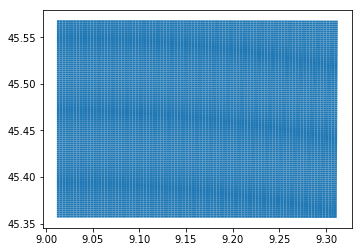

In [6]:
gridframe.plot()

plt.show()

# Read base station dataset

In [ ]:
BS = pd.read_csv('milan_basestations.csv')

BS.head()

## Convert Lat and Long to Points in BaseStation dataset and save as geodataframe

In [ ]:
geometry = [Point(xy) for xy in zip(BS.lon, BS.lat)]

crs = {'init': 'epsg:4326'}

BS_gdf = gpd.GeoDataFrame(BS, crs=crs, geometry=geometry)

In [ ]:
print(type(BS_gdf))

BS_gdf.head()

## Assign a column which points to the Milan grid ID a BS belongs to

In [ ]:
GridID = []

for indexBS, basestation in BS_gdf.iterrows():
    point = basestation['geometry']
    
    gridID = np.NaN
    for indexGrid, grid in gridframe.iterrows():
        gridGeo = grid['geometry']
        
        if(point.within(gridGeo)):
            gridID = grid['cellId']
            break
    
    print(gridID)
    GridID.append(gridID)

BS_gdf['gridID'] = GridID

## Save the grid based dataset to shape and CSV file

In [24]:
outshp = r"MilanBaseStation_Grid.shp"
outcsv = r"MilanBaseStation_Grid.csv"

BS_gdf.to_file(outshp)

#for CSV
BS['gridID'] = GridID
BS.to_csv(outcsv)

# Read the Wigle dataset for mapping it to grid

In [30]:
wifi_ap = pd.read_csv('milan_basestations.csv')

wifi_ap.head()

,Unnamed: 0,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,5745533,LTE,222,10,13006,7259424,0,9.102520,45.414919,3069,3,1,1414870373,1518460030,0
1,5745534,LTE,222,10,13006,7259423,0,9.076918,45.433805,1237,3,1,1414870373,1518460446,0
2,5745535,LTE,222,10,13006,7493920,0,9.078843,45.422766,1923,5,1,1414870373,1518443086,0
3,5745555,LTE,222,10,13006,7447329,0,9.068349,45.457393,2449,6,1,1414870373,1506002887,0
4,6255461,LTE,222,10,12020,7578912,0,9.252814,45.554622,3543,303,1,1423416086,1508328879,0


In [31]:
wifi_geometry = [Point(xy) for xy in zip(wifi_ap.lon, wifi_ap.lat)]

crs = {'init': 'epsg:4326'}

wifi_gdf = gpd.GeoDataFrame(wifi_ap, crs=crs, geometry=wifi_geometry)

## Convert Lat and Long to shapely points

In [32]:
print(type(wifi_gdf))

wifi_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,Unnamed: 0,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal,geometry
0,5745533,LTE,222,10,13006,7259424,0,9.102520,45.414919,3069,3,1,1414870373,1518460030,0,POINT (9.10252 45.414919)
1,5745534,LTE,222,10,13006,7259423,0,9.076918,45.433805,1237,3,1,1414870373,1518460446,0,POINT (9.076917999999999 45.433805)
2,5745535,LTE,222,10,13006,7493920,0,9.078843,45.422766,1923,5,1,1414870373,1518443086,0,POINT (9.078842999999999 45.422766)
3,5745555,LTE,222,10,13006,7447329,0,9.068349,45.457393,2449,6,1,1414870373,1506002887,0,POINT (9.068349000000001 45.457393)
4,6255461,LTE,222,10,12020,7578912,0,9.252814,45.554622,3543,303,1,1423416086,1508328879,0,POINT (9.252814000000001 45.55462199999999)


## Map Wifi access points to grids

In [34]:
WiFiGridID = []

for indexwifi, accesspoint in wifi_gdf.iterrows():
    point = accesspoint['geometry']
    
    gridID = np.NaN
    for indexGrid, grid in gridframe.iterrows():
        gridGeo = grid['geometry']
        
        if(point.within(gridGeo)):
            gridID = grid['cellId']
            break
    
    print(gridID)
    WiFiGridID.append(gridID)

wifi_gdf['gridID'] = WiFiGridID

outwificsv = r"wigledataset_Grid.csv"
wifi_ap['gridID'] = WiFiGridID
wifi_ap.to_csv(outwificsv)

2731
3622
3123
4719
9381
9610
6512
8116
4814
6007
9363
1050
8552
9484
5952
7158
9592
7943
8755
9383
1284
1254
1186
1471
4026
9608
1376
1547
1773
1555
7818
8326
1278
1088
490
5122
8622
2823
1560
1351
2137
2255
3123
1747
1471
3325
2039
3322
9409
9313
7639
1647
1456
1765
2249
1744
2628
1855
9254
196
5548
7041
6343
7943
8858
8470
8683
9380
2819
4837
3322
4836
4532
2926
4635
2820
5744
6772
6668
5148
6773
9694
6768
8032
6354
6355
951
777
9458
769
6937
2847
1355
6134
1563
7325
9039
2856
3574
2969
1474
1883
2872
1663
3773
7382
8494
8590
7180
7571
7671
5190
1691
2883
7493
7269
6397
2987
5592
5982
4792
396
2494
2685
7071
2789
7368
7571
7494
4092
4283
4985
9172
8489
9184
7268
5867
9923
6051
3962
5251
2468
5360
9615
5071
5350
5656
2909
7636
3873
2617
6768
5954
9728
2813
8128
7062
2790
3110
6117
2304
3523
3830
4108
2732
4238
5718
4021
3728
4203
2538
2865
1148
1844
6120
3219
4136
3452
1445
1446
5722
3110
3228
4210
1944
2334
5816
6313
3314
3624
2812
3424
4340
1656
1045
1048
945
2452
1843
2145
4536
27